In [48]:
import numpy as np
import pandas as pd
from importlib import reload
import util
reload(util)
data = util.FontData

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [50]:
data.load()

Loading embeddings...done
Loading typographic + semantic vectors...done
Loading images...Image data not found; ignoring...done
Loading glyphs...done
Loading SVGs...done


In [95]:
pca = PCA(n_components=2)

In [96]:
embeddings = data.get_all_embedding('all')
embeddings_pca = pca.fit_transform(embeddings)

In [64]:
semantic = data.get_all_semantic('all')

In [65]:
attribute_names = np.loadtxt('data/attrNames.txt', dtype=str)
typographic_features = np.asarray(['font_name', 'capitals', 'cursive', 'display', 'italic', 'monospace', 'serif'])
semantic_features = attribute_names[~np.isin(attribute_names, typographic_features)]

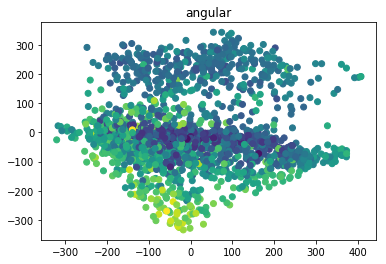

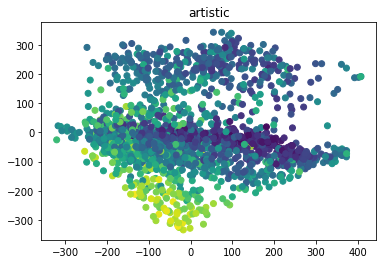

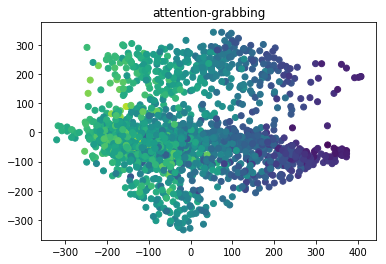

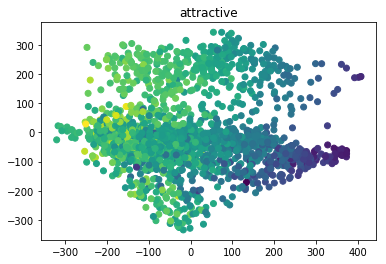

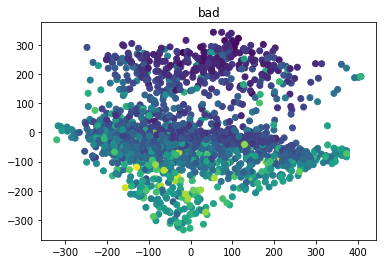

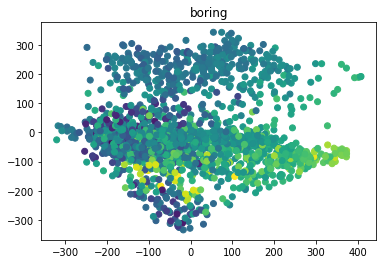

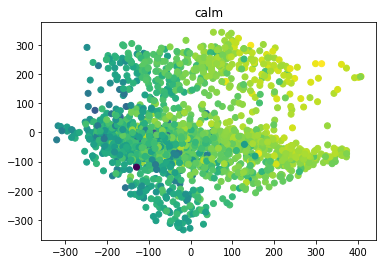

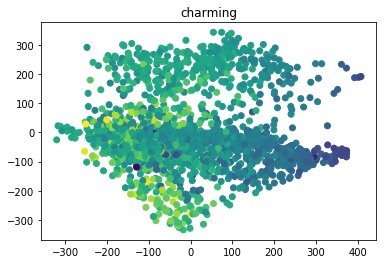

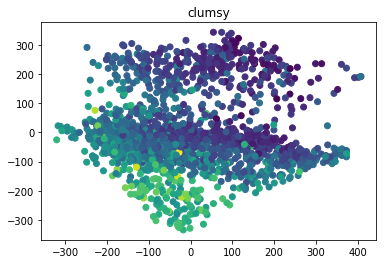

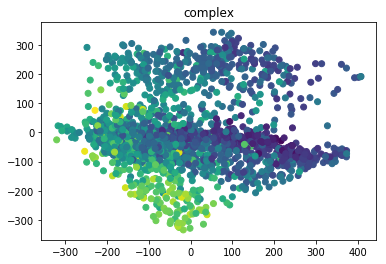

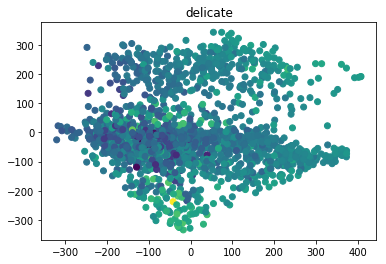

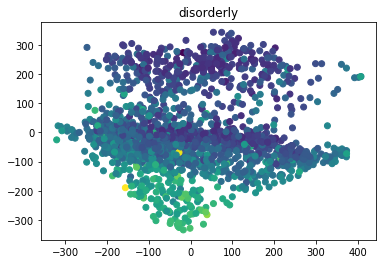

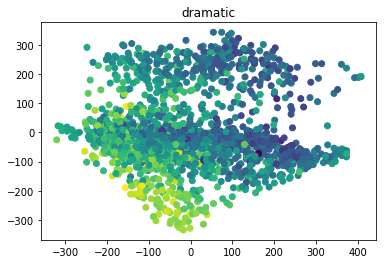

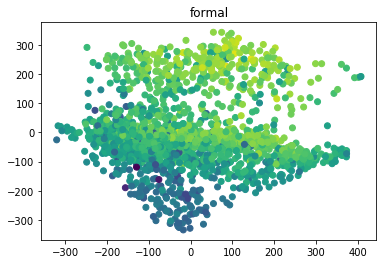

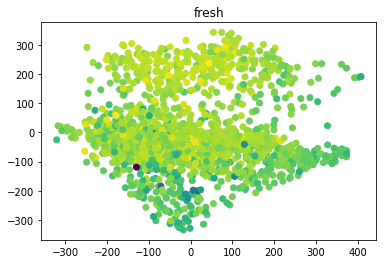

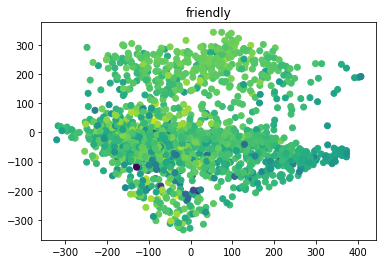

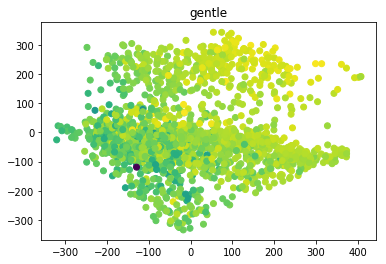

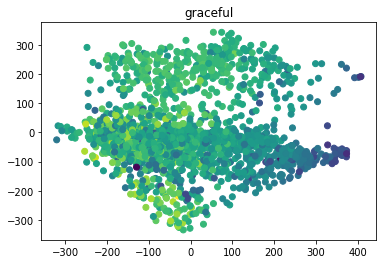

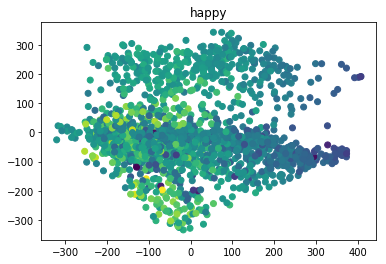

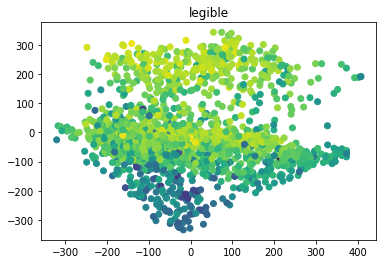

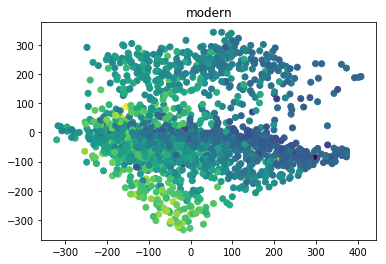

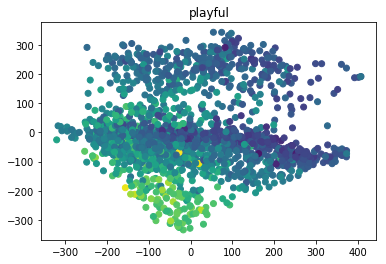

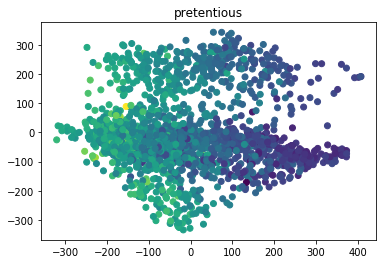

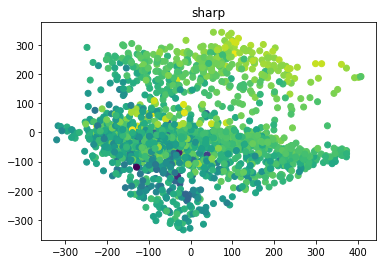

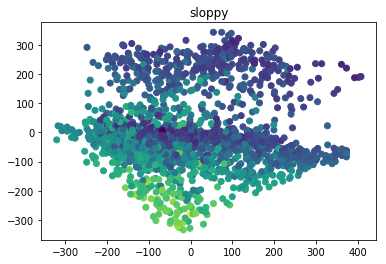

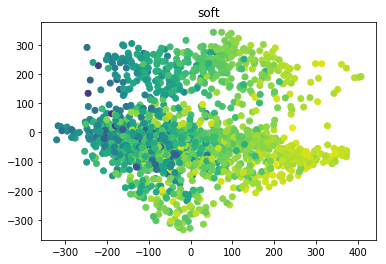

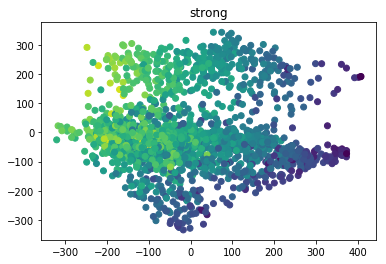

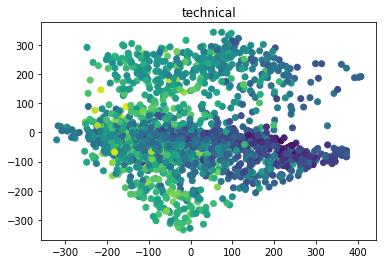

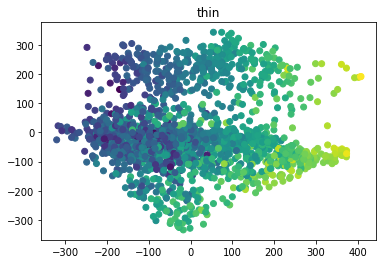

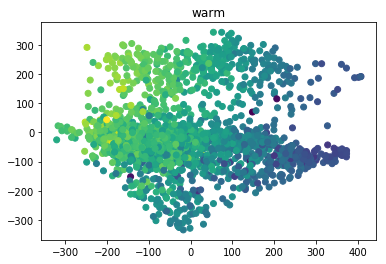

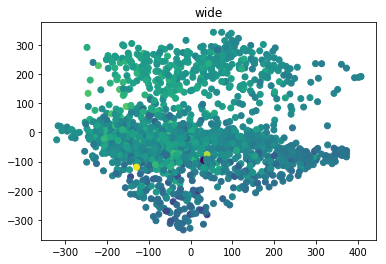

In [97]:
for i in range(0, semantic.shape[1]):
    y_1d = semantic[:, i]
    X0, X1 = embeddings_pca[:, 0], embeddings_pca[:, 1]
    ax = plt.gca()
    ax.scatter(X0, X1, c=y_1d, cmap=plt.cm.viridis)
    ax.set_title(semantic_features[i])
    plt.show()

In [76]:
dir_path = 'data/'
fj_unlabeled_font_vectors = pd.read_pickle(dir_path + 'fj_ul_font_vectors.pkl')
fj_labeled_font_vectors = pd.read_pickle(dir_path + 'fj_l_font_vectors.pkl')
common_attribute_labels = pd.read_pickle(dir_path + 'common_attribute_labels.pkl')

In [77]:
X = fj_labeled_font_vectors.iloc[:, 1:]
y = common_attribute_labels.iloc[:, 1:]

In [78]:
X_pca = pca.fit_transform(X)

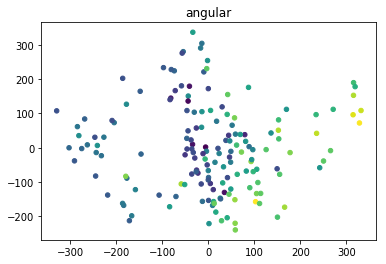

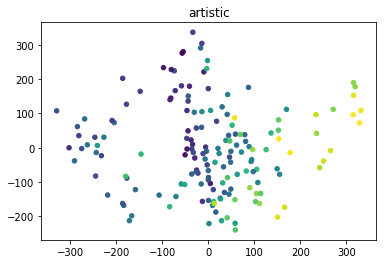

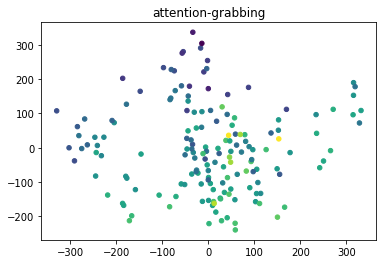

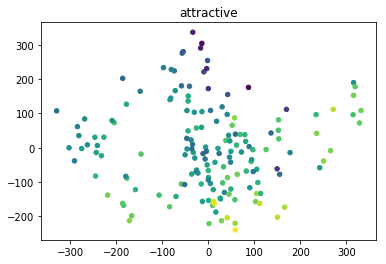

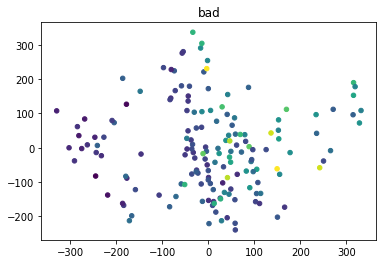

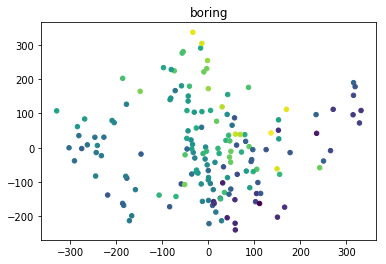

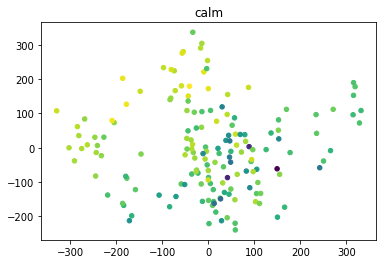

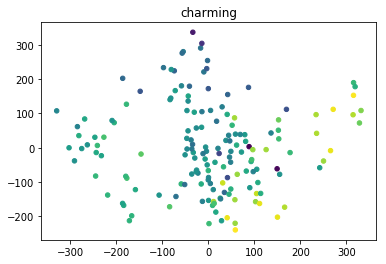

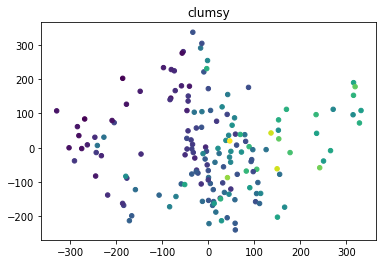

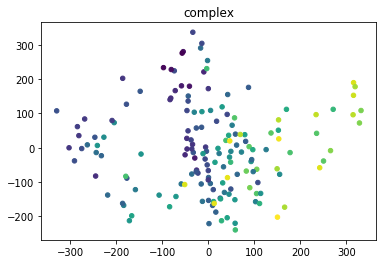

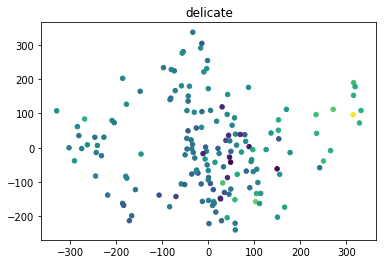

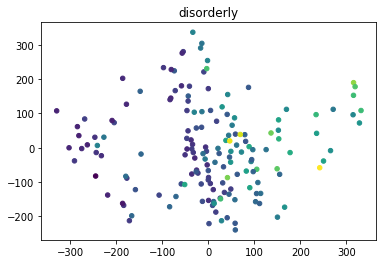

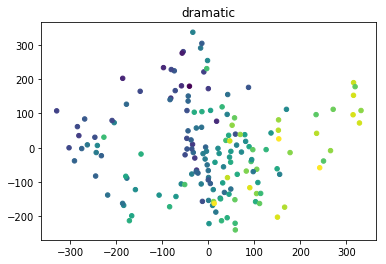

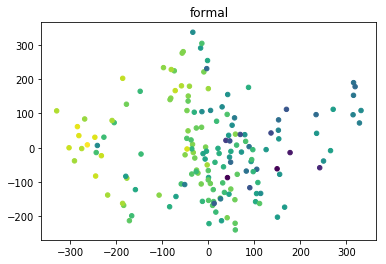

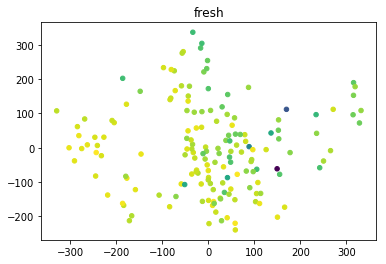

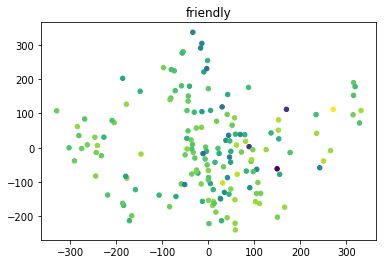

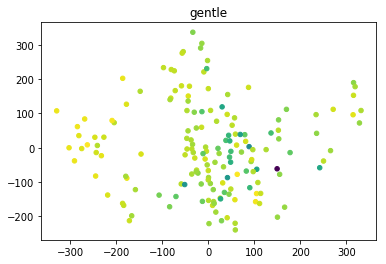

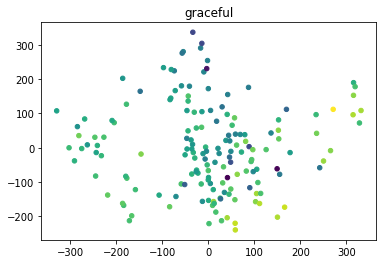

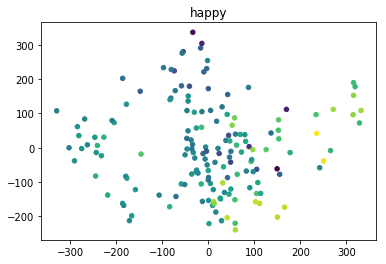

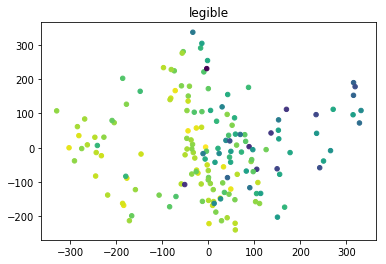

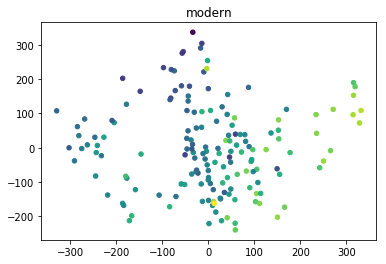

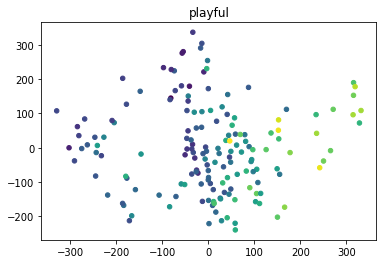

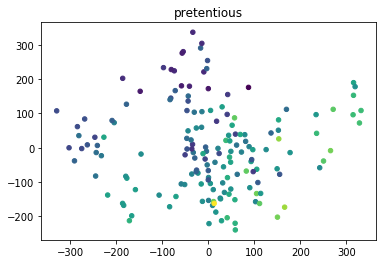

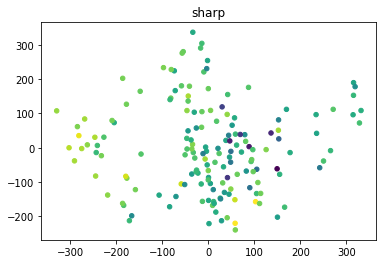

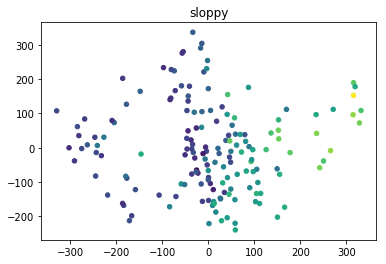

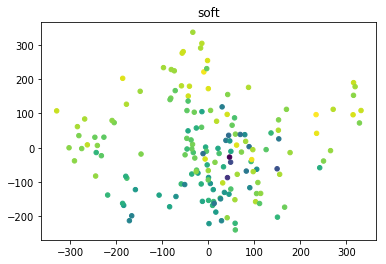

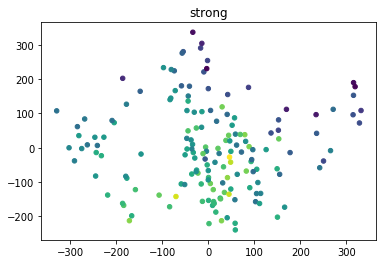

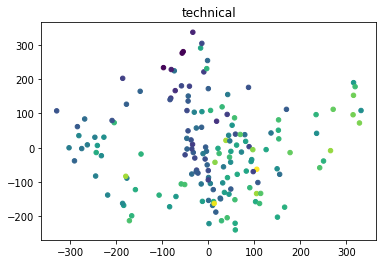

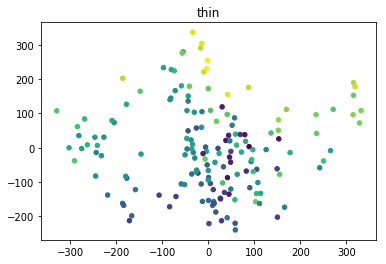

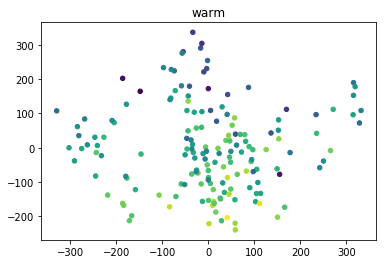

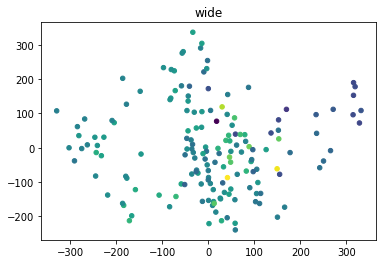

In [81]:
for i in range(0, y.shape[1]):
    if attribute_names[i] in semantic_features:
        y_1d = y.iloc[:, i]
        X0, X1 = X_pca[:, 0], X_pca[:, 1]
        ax = plt.gca()
        ax.scatter(X0, X1, c=y_1d, cmap=plt.cm.viridis, s=20)
        ax.set_title(attribute_names[i])
        plt.show()

In [100]:
pca = PCA(n_components=3)

In [101]:
embeddings_pca = pca.fit_transform(embeddings)

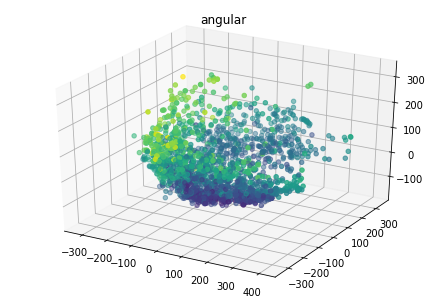

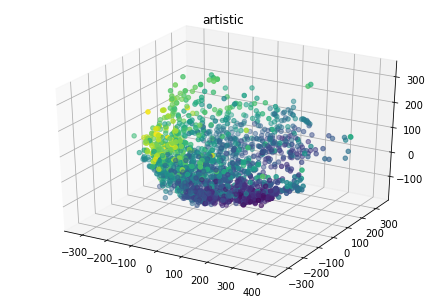

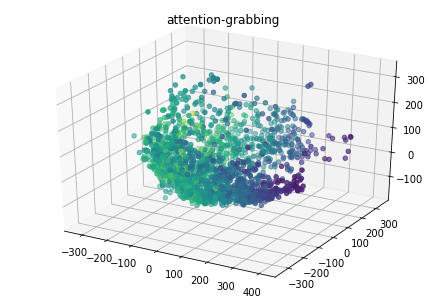

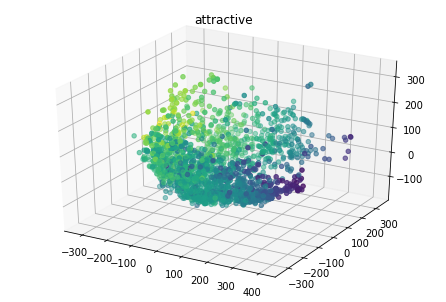

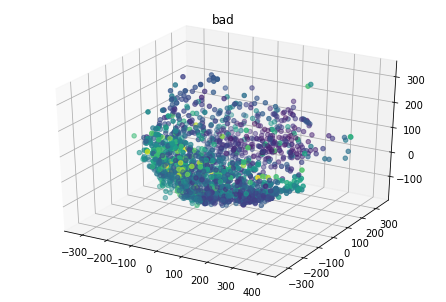

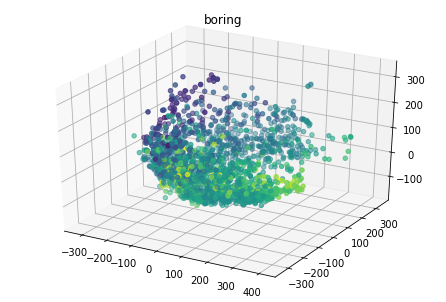

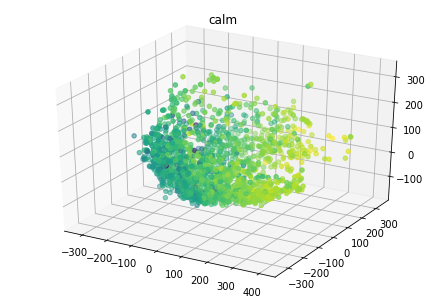

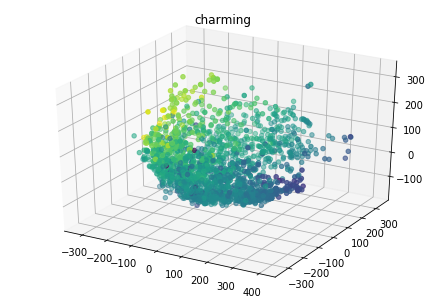

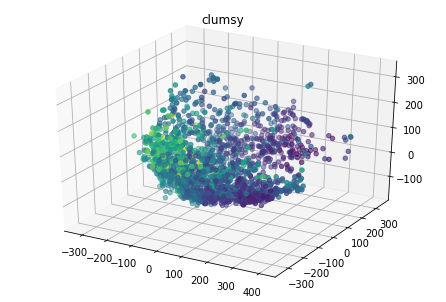

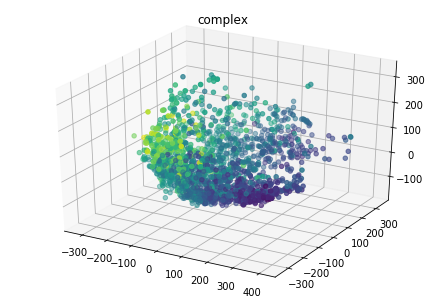

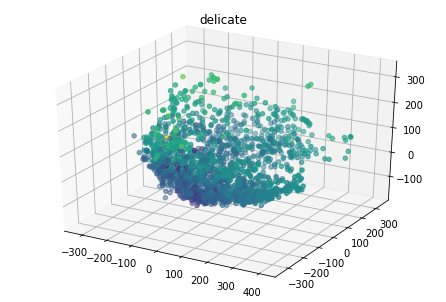

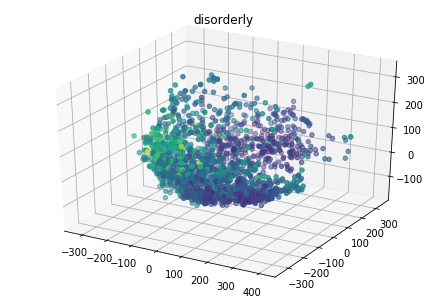

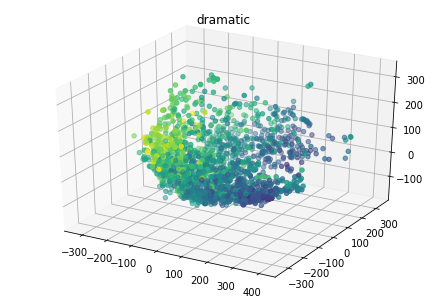

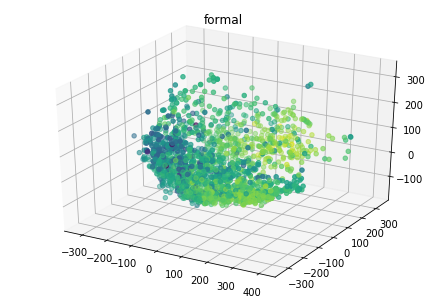

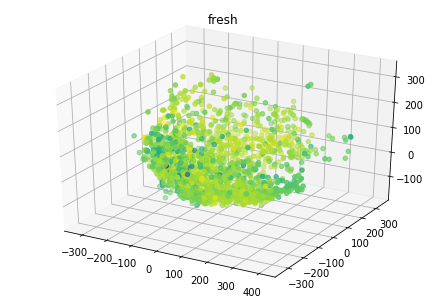

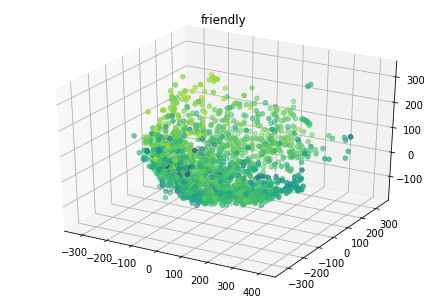

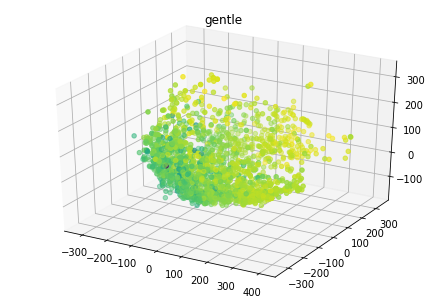

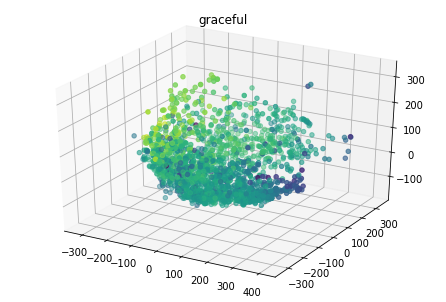

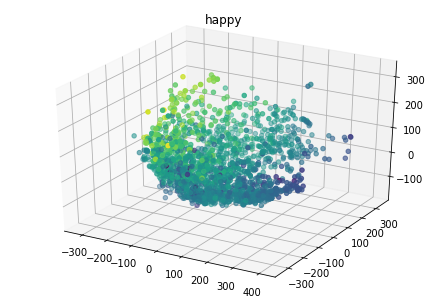

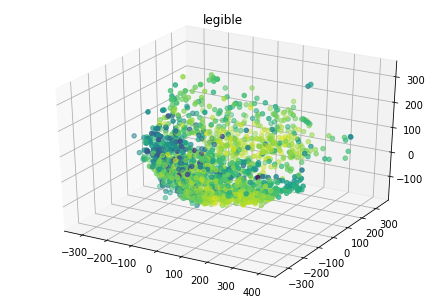

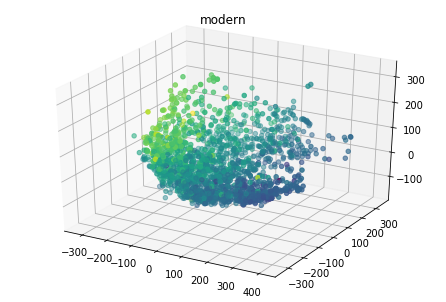

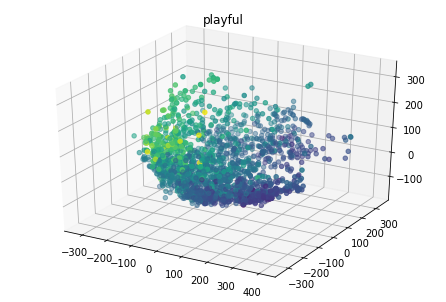

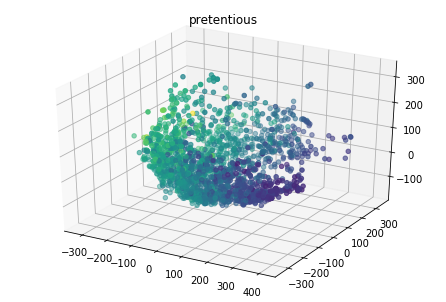

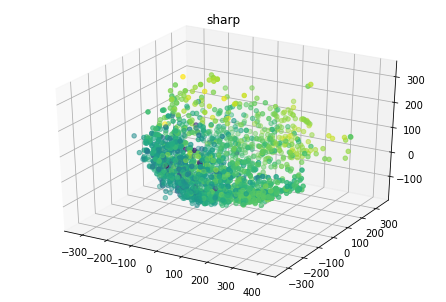

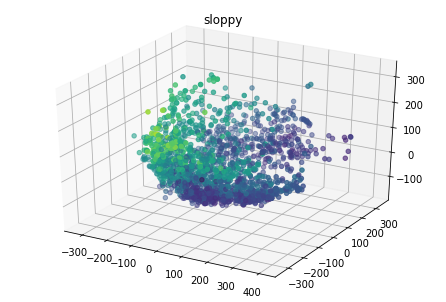

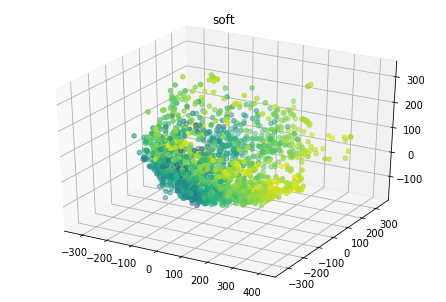

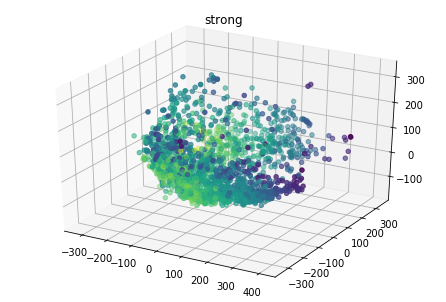

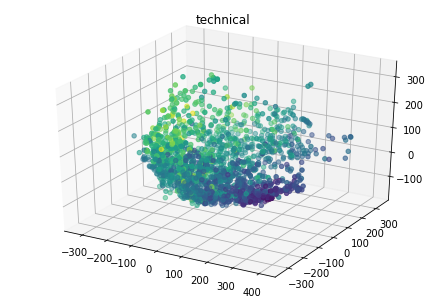

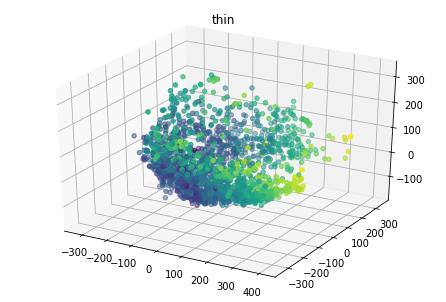

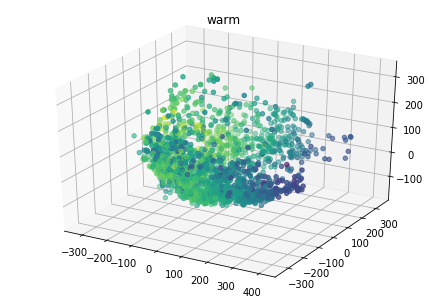

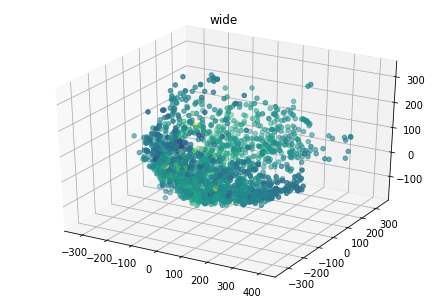

In [102]:
for i in range(0, semantic.shape[1]):
    y_1d = semantic[:, i]
    X0, X1, X2 = embeddings_pca[:, 0], embeddings_pca[:, 1], embeddings_pca[:, 2]
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X0, X1, X2, c=y_1d, cmap=plt.cm.viridis)
    ax.set_title(semantic_features[i])
    plt.show()

In [103]:
X_pca = pca.fit_transform(X)

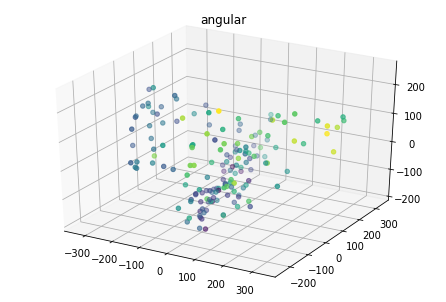

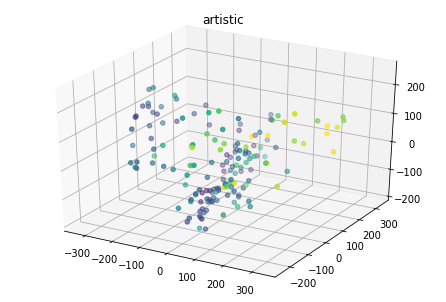

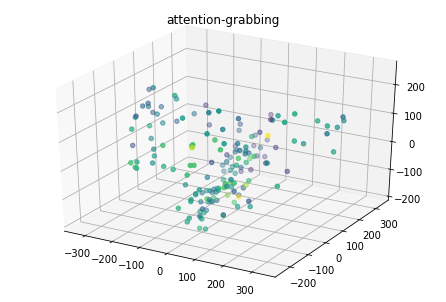

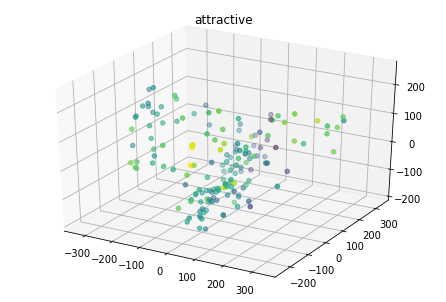

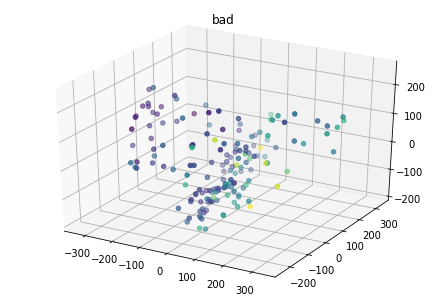

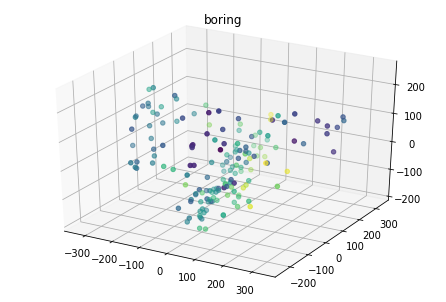

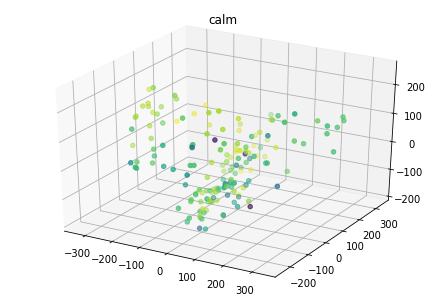

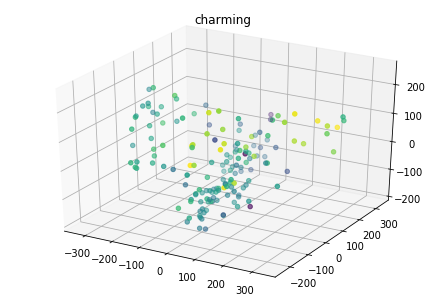

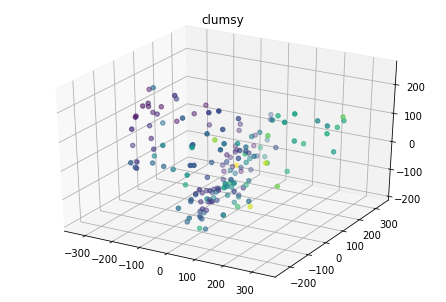

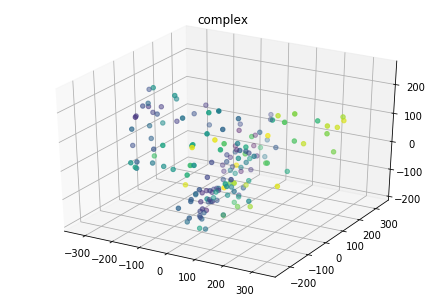

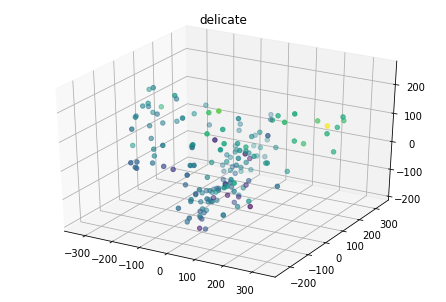

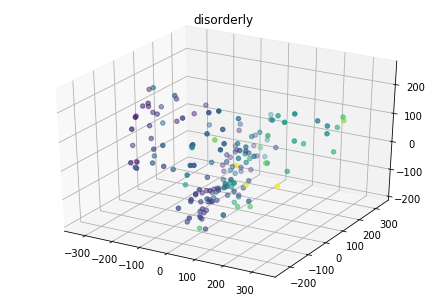

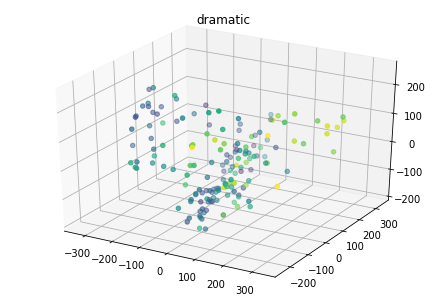

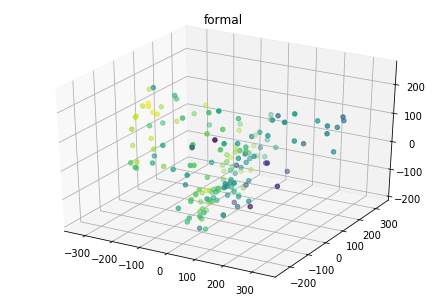

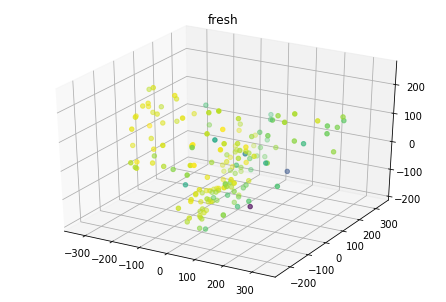

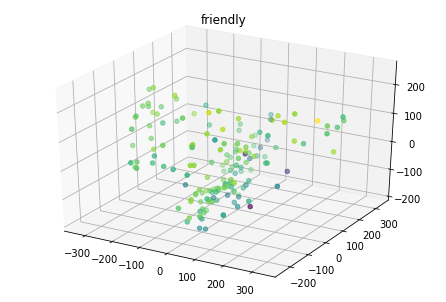

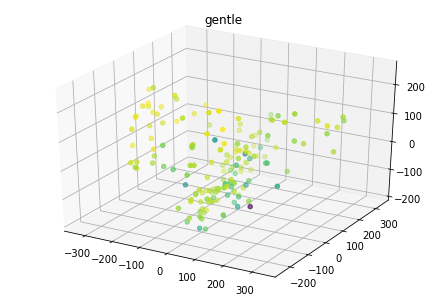

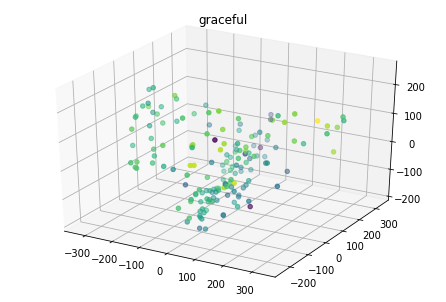

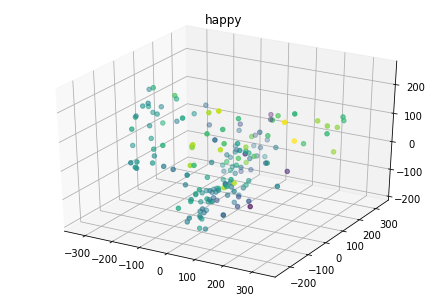

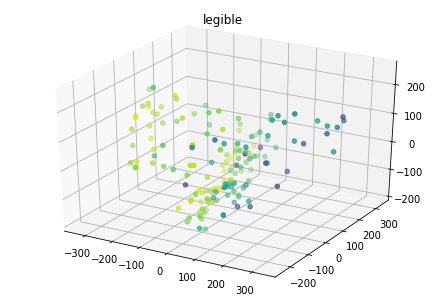

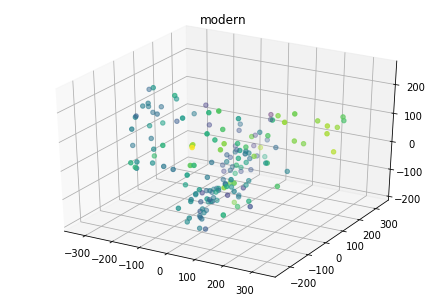

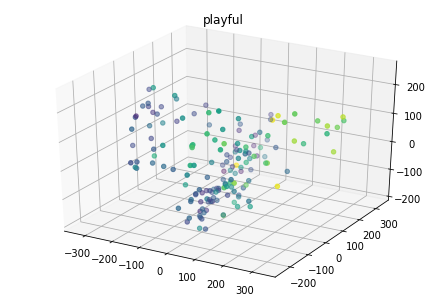

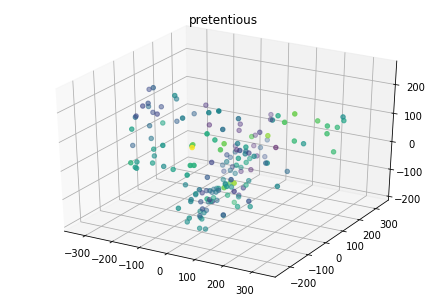

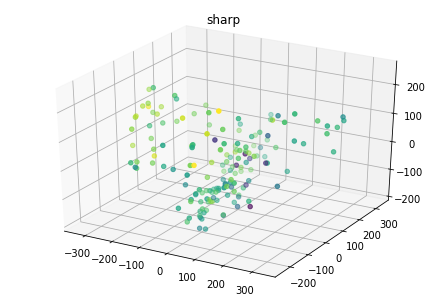

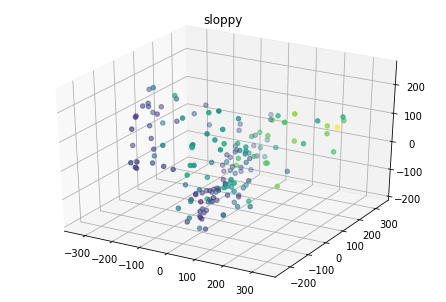

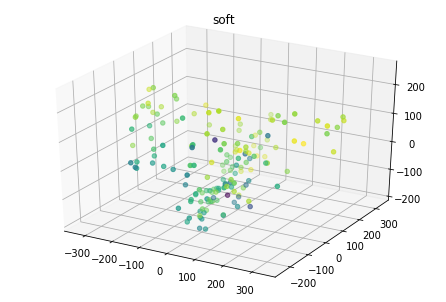

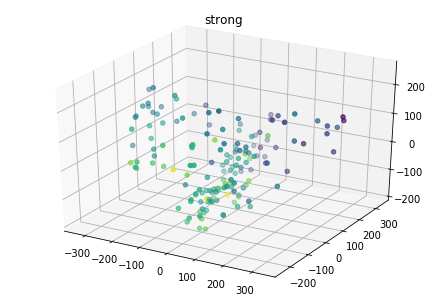

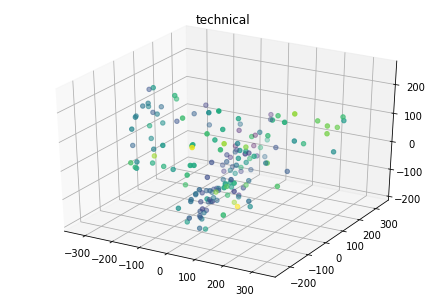

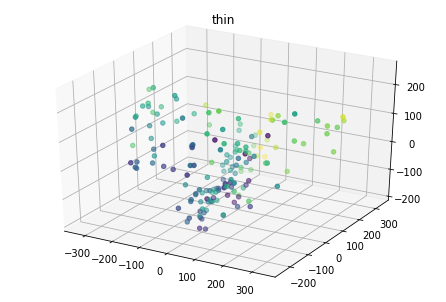

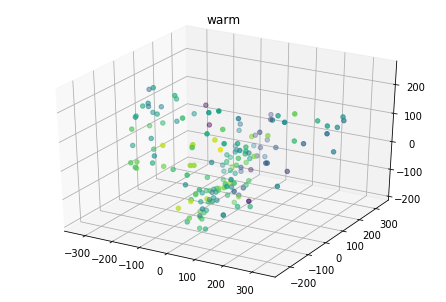

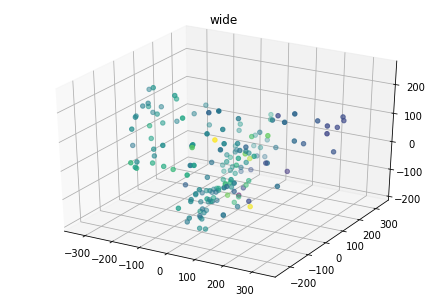

In [104]:
for i in range(0, y.shape[1]):
    if attribute_names[i] in semantic_features:
        y_1d = y.iloc[:, i]
        X0, X1, X2 = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(X0, X1, X2, c=y_1d, cmap=plt.cm.viridis, s=20)
        ax.set_title(attribute_names[i])
        plt.show()